In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Orthogonal Matrices
An  orthogonal  matrix  is  a special  matrix  that  is  important  for  several  decompositions,  including  QR,  eigende‐composition, and singular value decomposition. The letter Q is often used to indicate orthogonal matrices. <br>Orthogonal matrices have two properties:
1. Orthogonal columnsAll columns are pair-wise orthogonal.
2. Unit-norm columnsThe norm (geometric length) of each column is exactly 1.

We can translate those two properties into a mathematical expression $$ \langle a,b \rangle $$ is an alternative notation for the dot product
$$
\langle \mathbf{q}_i, \mathbf{q}_j \rangle = 
\begin{cases} 
0, & \text{if } i \neq j \\
1, & \text{if } i = j 
\end{cases}
$$<br>
It means that the dot product of a column with itself is 1 while the dot product of a column with any other column is 0. That’s a lot of dot products with  only  two  possible  outcomes.  We  can  organize  all  of  the  dot  products  amongst all  pairs  of  columns  by  premultiplying  the  matrix  by  its  transpose.  Remember  that matrix  multiplication  is  defined  as  dot  products  between  all  rows  of  the  left  matrix with all columns of the right matrix; therefore, the rows of $Q^T$ are the columns of Q.<br>
The  matrix  equation  expressing  the  two  key  properties  of  an  orthogonal  matrix  is simply marvelous:$$Q^TQ = I $$<br>
The expression $Q^TQ=I$ is amazing. Really, it’s a big deal.<br>
$Q^T$ is a matrix that multiplies Q to produce the identity matrix.  That’s  the  exact  same  definition  as  the  matrix  inverse.  Thus,  the  inverse  of an orthogonal matrix is its transpose. That’s crazy cool, because the matrix inverse is tedious and prone to numerical inaccuracies, whereas the matrix transpose is fast and accurate.
#### Examples of Orthogonal Matrices
Identity Matrix, Pure  rotation  matrices (Chapter 7), Permutation matrices are also orthogonal. Permutation matrices are used to exchange rows  of  a  matrix; etc.<br>
An orthogonal matrix can be computed from a nonorthogonal matrix via QR decomposition, which is basically a sophisticated version of Gram-Schmidt. And how does Gram-Schmidt work? That’s basically the orthogonal vector decomposition that we learned about in Chapter 2.

## The Gram-Schmidt Procedure
The Gram-Schmidt procedure is a way to transform a non-orthogonal matrix into an orthogonal matrix.
A  matrix  V  comprising  columns  $v_1$  through  $v_n$  is  transformed  into  an  orthogonal matrix Q with columns $q_k$ according to the following algorithm :-
For  all  column  vectors  in  V  starting  from  the  first  (leftmost)  and  moving  systematically to the last (rightmost):
1. Orthogonalize  $v_k$  to  all  previous  columns  in  matrix  Q  using  orthogonal  vector decomposition.  That  is,  compute  the  component  of  $v_k$  that  is  perpendicular  to $q_k− 1$, $q_k− 2$, and so on down to $q_1$. The orthogonalized vector is called $v^*_k$.
2. Normalize $v^*_k$ to unit length. This is now $q_k$, the $k^{th}$ column in matrix Q.

## QR Decomposition
The  Gram-Schmidt procedure  transforms  a  matrix  into  an  orthogonal  matrix  Q. Q  is  obviously  different  from  the  original  matrix  (assuming  the  original  matrix was  not  orthogonal). So  we  have  lost  information  about  that  matrix.  Fortunately,that  “lost”  information  can  be  easily  retrieved  and  stored  in  another  matrix  R  that multiplies  Q. Recovering R through matrix multiplication is possible because GS is a series of linear transformations. Creating  R  isstraight forward and comes right from the definition of QR:-<br>
$$
A = QR
$$
$$
Q^T = Q^TQR
$$
$$
Q^TA = R
$$


In [2]:
#Python Code
A = np.random.randn(6,6)
Q,R = np.linalg.qr(A)

### Sizes of Q and R
The  sizes  of  Q  and  R  depend  on  the  size  of  the  to-be-decomposed  matrix  A  and  on whether  the  QR  decomposition  is  “economy”  (also  called  “reduced”)  or  “full”  (also called “complete”).<br>
Economy  versus  full  QR  decomposition  applies  only  to  tall  matrices.  The  question is  this:  for  a  tall  matrix  (M  >  N),  do  we  create  a  Q  matrix  with  N  columns  or  M columns? The former option is called economy or reduced, and gives a tall Q; and the latter option is called full or complete, and gives a square Q.<br>
It may seem surprising that Q can be square when A is tall (in other words, that Q can have  more  columns  than  A):  where  do  the  extra  columns  come  from?  It  is,  in  fact, possible to craft orthogonal vectors “out of thin air.” Consider the following example in  Python:

In [3]:
A = np.array([[1,-1]]).T
Q,R = np.linalg.qr(A, 'complete')
Q*np.sqrt(2) # scaled by sqrt(2) to get integers

array([[-1.,  1.],
       [ 1.,  1.]])

Notice the optional second input 'complete', which produces a full QR decomposition.  Setting  that  to  'reduced',  which  is  the  default,  gives  the  economy-mode  QRdecomposition, in which Q is the same size as A.

In [4]:
A = np.array([[1,-1]]).T
Q,R = np.linalg.qr(A, 'reduced')
Q*np.sqrt(2) # scaled by sqrt(2) to get integers

array([[-1.],
       [ 1.]])

Because  it  is  possible  to  craft  more  than  M  >  N  orthogonal  vectors  from  a  matrix with N columns, the rank of Q is always the maximum possible rank, which is M for all  square  Q  matrices  and  N  for  the  economy  Q.  The  rank  of  R  is  the  same  as  the rank of A.<br>
The difference in rank between Q and A resulting from orthogonalization means that Q spans all of $ℝ^M$ even if the column space of A is only a lower-dimensional subspace of  $ℝ^M$.  That  fact  is  central  to  why  the  singular  value  decomposition  is  so  useful  for revealing the properties of a matrix, including its rank and null space.<br>
A  note  about  uniqueness: <br> QR  decomposition  is  not  unique  for  all  matrix  sizes and  ranks.  This  means  that  it  is  possible  to  obtain  $A=Q_1R_1$  and  $A=Q_2R_2$  where Q1≠Q2.<br>
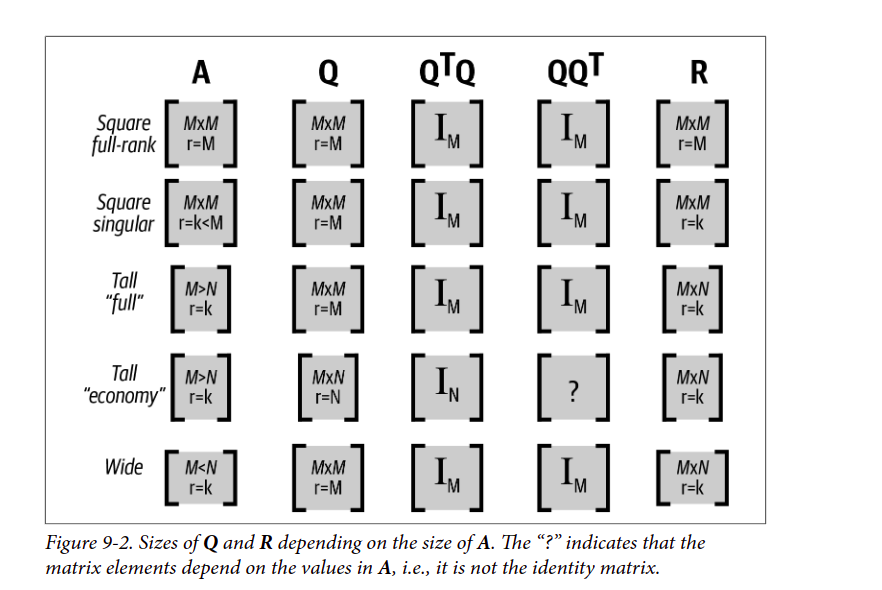

Several  important  features  of  QR  decomposition  are  visible  in  Figure  9-1,  including that A=QR (their difference is the zeros matrix) and that Q times its transpose gives the identity matrix.<br>
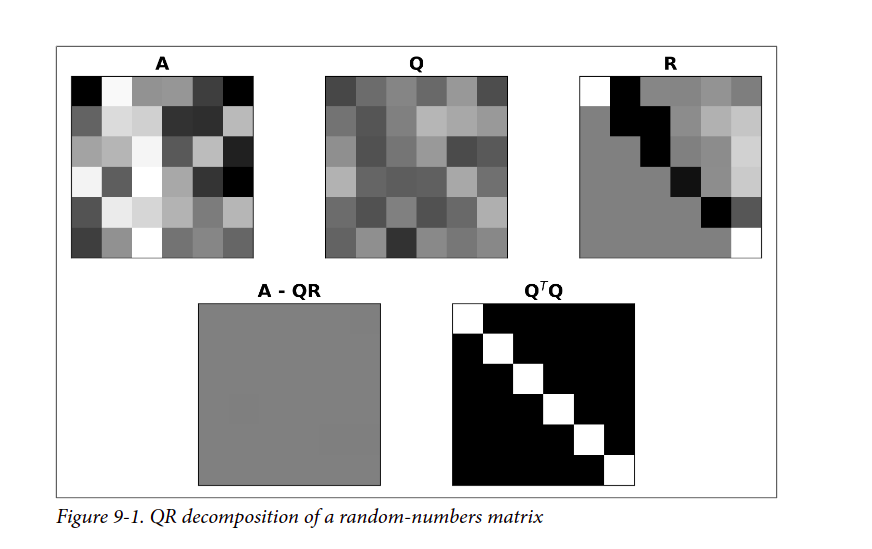<br>
Check  out  the  R  matrix:  it’s  upper-triangular  (all  elements  below  the  diagonal  are zero). That seems unlikely to have occurred by chance, considering we started from a random matrix. In fact, the R matrix is always upper-triangular.<br>
1. R comes from the formula $Q^TA$=R.
2. The  lower  triangle  of  a  product  matrix  comprises  dot  products  between  later rows of the left matrix and earlier columns of the right matrix.
3. The rows of $Q^T$ are the columns of Q.

Putting  those  together:  because  orthogonalization  works  column-wise  from  left  to right,  later  columns  in  Q  are  orthogonalized  to  earlier  columns  of  A.  Therefore,  the lower  triangle  of  R  comes  from  pairs  of  vectors  that  have  been  orthogonalized.  In contrast,  earlier  columns  in  Q  are  not  orthogonalized  to  later  columns  of  A,  so  we would not expect their dot products to be zero.<br>
If  columns  i  and  j  of  A  were  already  orthogonal,  then  the  corresponding (i,j)th element in R would be zero. In fact, if you compute the QR decomposition  of  an  orthogonal  matrix,  then  R  will  be  a  diagonal  matrix  in  which  the diagonal elements are the norms of each column in A. That means that if A=Q, then R=I,  which  is  obvious  from  the  equation  solved  for  R.

### QR and Inverses
QR  decomposition  provides  a  more  numerically  stable  way  to  compute  the  matrix inverse.
<b>
A = QR
$$A^{-1} = (QR)^{-1}$$
$$A^{-1} = R^{-1}Q^{-1}$$
$$A^{-1} = R^{-1}Q^{T}$$
</b><br>
we can obtain the inverse of A as the inverse of R times the transpose of Q. Q is numerically stable due to the Householder reflection algorithm, and R is numerically stable because it simply results from matrix multiplication.<br>

## Code Exercises

### Question 9-1. A square Q has the following equalities:<br>$$Q^TQ = QQ^T = Q^{‐1}Q = QQ^{‐1} = I $$.<br>Demonstrate  this  in   code  by  computing Q  from  a  random-numbers  matrix,  then compute $Q^T$ and $Q^{−1}$. Then show that all four expressions produce the identity matrix.

In [14]:
m = 7
A = np.random.randn(m,m)
I = np.eye(m,m)
Q = np.linalg.qr(A)[0]
Q_t = Q.T
Q_inv = np.linalg.inv(Q)
print(np.round(Q_t@Q,2))
print(np.round(Q@Q_t,2))
print(np.round(Q_inv@Q,2))
print(np.round(Q@Q_inv,2))
print(np.round(Q_t@Q,2)==I)
print(np.round(Q@Q_t,2)==I)
print(np.round(Q_inv@Q,2)==I)
print(np.round(Q@Q_inv,2)==I)

[[ 1. -0.  0. -0.  0.  0.  0.]
 [-0.  1. -0. -0. -0.  0. -0.]
 [ 0. -0.  1. -0.  0.  0. -0.]
 [-0. -0. -0.  1. -0.  0.  0.]
 [ 0. -0.  0. -0.  1.  0. -0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0. -0. -0.  0. -0.  0.  1.]]
[[ 1.  0. -0.  0.  0. -0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [-0.  0.  1.  0. -0. -0. -0.]
 [ 0.  0.  0.  1. -0.  0.  0.]
 [ 0.  0. -0. -0.  1. -0.  0.]
 [-0.  0. -0.  0. -0.  1. -0.]
 [ 0.  0. -0.  0.  0. -0.  1.]]
[[ 1. -0. -0.  0. -0. -0.  0.]
 [ 0.  1.  0.  0. -0.  0. -0.]
 [ 0.  0.  1. -0. -0.  0. -0.]
 [ 0. -0.  0.  1. -0.  0. -0.]
 [-0. -0. -0.  0.  1. -0.  0.]
 [-0.  0. -0. -0.  0.  1.  0.]
 [-0.  0.  0. -0.  0. -0.  1.]]
[[ 1.  0. -0.  0.  0.  0. -0.]
 [ 0.  1. -0.  0.  0.  0.  0.]
 [-0.  0.  1. -0.  0.  0. -0.]
 [-0.  0.  0.  1. -0.  0. -0.]
 [ 0.  0. -0.  0.  1.  0.  0.]
 [ 0. -0. -0. -0.  0.  1. -0.]
 [-0. -0.  0.  0. -0.  0.  1.]]
[[ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True 

### Question 9-2. Implement  the  Gram-Schmidt  procedure  as  described  earlier.<br>  Use  a  4 × 4  random-numbers matrix. <br>Check your answer against Q from np.linalg.qr.<br>Important:  there  is  a  fundamental  sign  uncertainty  in  transformations  like  the Householder  reflection.  This  means  that  vectors  can  “flip”  (be  multiplied  by  −1) depending on minor differences in algorithm and implementation. This feature exists in  many  matrix  decompositions  including  eigenvectors.  I  have  a  longer  and  morein-depth  discussion  of  why  this  is  and  what  it  means  in  Chapter  13.  For  now,  the upshot  is  this:  subtract  your  Q  from  Python’s  Q  and  add  your  Q  and  Python’s  Q. Nonzero columns in one will be zeros in the other.

In [15]:
A = np.random.randn(4,4)
# initialize
Q = np.zeros((4,4))


# the Gram-Schmidt algo
for i in range(4):
    
    # initialize
    Q[:,i] = A[:,i]
    
    # orthogonalize
    a = A[:,i] # convenience
    for j in range(i): # only to earlier cols
        q = Q[:,j] # convenience
        Q[:,i]=Q[:,i]-np.dot(a,q)/np.dot(q,q)*q
    
    # normalize
    Q[:,i] = Q[:,i] / np.linalg.norm(Q[:,i])

    
# "real" QR decomposition for comparison
Q2,R = np.linalg.qr(A)


# note the possible sign differences.
# seemingly non-zero columns will be 0 when adding
print( np.round( Q-Q2 ,10) ), print(' ')
print( np.round( Q+Q2 ,10) )

[[ 1.89536402  0.          0.17795077  0.25258383]
 [ 0.50567077 -0.         -0.91065907 -1.54480224]
 [ 0.2132779   0.          1.63210456 -0.39013047]
 [-0.32619758  0.          0.68939705 -1.18219527]]
 
[[ 0.          0.55868612  0.         -0.        ]
 [ 0.         -0.72703726 -0.          0.        ]
 [ 0.         -1.06702645 -0.         -0.        ]
 [-0.          1.42152777 -0.         -0.        ]]


### Question 9-3.In   this  exercise,  you  will  find  out  what  happens  when  you  apply  QR  decomposition to  a matrix that is  almost-but-not-quite orthogonal. First, create an orthogonal matrix,called U,  from  the  QR  decomposition  of    a  6 × 6  random-numbers  matrix.  Compute the  QR  decomposition  of    U,  and  confirm  that R=I  (and  make  sure  you  understandwhy!).<br>Second, modify the norms of each column of U. Set the norms of columns 1–6 to be10–15  (that  is,  the  first  column  of  U  should  have  a  norm  of  10,  the  second  column should  have  a  norm  of  11,  and  so  on).  Run  that  modulated  U  matrix  through  QRdecomposition  and  confirm  that  its  R  is  a  diagonal  matrix  with  diagonal  elementsequaling 10–15. What is QTQ for this matrix?<br>Third, break the orthogonality of U by setting element u1, 4= 0. What happens to Rand why?

In [16]:
# create an orthogonal matrix, call it U (to avoid confusing with Q)
U = np.linalg.qr( np.random.randn(6,6) )[0]


# part 2: modulate the column norms
for i in range(U.shape[0]):
  U[:,i] = U[:,i]*(10+i)


# part 3: Change one matrix element
U[0,3] = 0 # this is q_{1,4}


# QR decomp
q,r = np.linalg.qr(U)

# show R and, for part 2, Q'Q
print( np.round(r,3) ), print(' ')
print( np.round(Q.T@Q,4))

[[ 1.0000e+01 -0.0000e+00 -0.0000e+00 -1.4540e+00 -0.0000e+00  0.0000e+00]
 [ 0.0000e+00  1.1000e+01 -0.0000e+00  4.8820e+00  0.0000e+00 -0.0000e+00]
 [ 0.0000e+00  0.0000e+00  1.2000e+01 -3.4700e+00 -0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  8.5340e+00 -1.4000e-02  7.0900e-01]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.4000e+01  1.0000e-03]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.4983e+01]]
 
[[ 1.  0.  0.  0.]
 [ 0.  1.  0. -0.]
 [ 0.  0.  1. -0.]
 [ 0. -0. -0.  1.]]


### Question- 9.4. The purpose of this exercise is to compare the numerical errors using the “old-school” inverse method you learned in the previous chapter to the QR-based inverse method. We will use random-numbers matrices, keeping in mind that they tend to be numerically stable and thus have accurate inverses.<br>
### Here’s what to do: <br> Copy the code from Exercise 8-2 into a Python function that takes a matrix as input and provides its inverse as output. <br>(You can also include a check that the  input  matrix  is  square  and  full-rank.)   call  this  function  oldSchoolInv.<br>Next,create  a  5 × 5  random-numbers  matrix.  <br>Compute  its  inverse  using  the  old-school method  and  the  QR  decomposition  method  introduced  in  this  chapter  (you  can  use your “old-school method” to compute $R^{−1}$). <br>Compute the inverse-estimation error as the  Euclidean  distance  from  the  matrix  times  its  inverse  to  the  true  identity  matrix from  np.eye.  Make  a  barplot  of  the  results,  showing  the  two  methods  on  the  x-axis and the error (Euclidean distance to I) on the y-axis, as in Figure 9-3. <br>
### Run  the  code  multiple  times  and  inspect  the  barplot.  You’ll  find  that  sometimes the  old-school  method  is  better  while  other  times  the  QR  method  is  better  (smaller numbers  are  better;  in  theory,  the  bars  should  have  zero  height).  Try  it  again  using a  30 × 30  matrix.  Are  the  results  more  consistent?  In  fact,  there  is  a  lot  of  variance from  run  to  run.  This  means  we  should  run  an  experiment  where  we  repeat  the comparison many times. That’s the next exercise.<br>
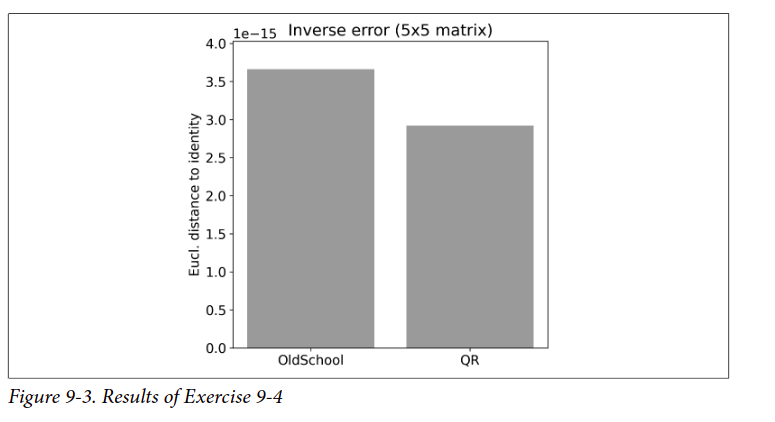

In [17]:
# a function to compute the inverse
def oldSchoolInv(A):

  # matrix size
  m = A.shape[0]


  # abort if non-square
  if not np.diff(A.shape)[0]==0:
    raise Exception('Matrix must be square.')
  
  # abort if singular
  if np.linalg.matrix_rank(A)<m:
    raise Exception('Matrix must be full-rank.')


  # initialize
  M = np.zeros((m,m)) # minors matrix
  G = np.zeros((m,m)) # grid matrix

  # compute minors matrix
  for i in range(m):
    for j in range(m):
      
      # select rows and cols
      rows = [True]*m
      rows[i] = False
      
      cols = [True]*m
      cols[j] = False
      
      # compute the minors
      M[i,j]=np.linalg.det(A[rows,:][:,cols])
      
      # compute Grid
      G[i,j] = (-1)**(i+j)

          
  # compute cofactors matrix
  C = M * G

  # compute adjugate matrix
  return C.T / np.linalg.det(A)

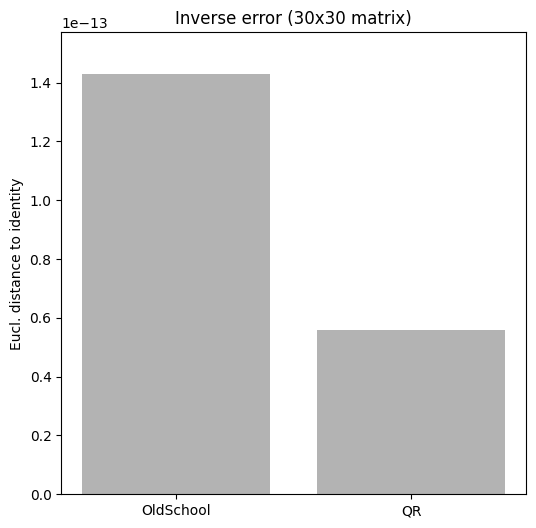

In [19]:
# create a matrix
n = 30
A = np.random.randn(n,n)

# old-school inverse method
Ainv_old = oldSchoolInv(A)
AAi_old  = Ainv_old@A

# via QR
Q,R = np.linalg.qr(A)
Ainv_qr = oldSchoolInv(R)@Q.T
AAi_qr  = Ainv_qr@A



# differences
trueI = np.eye(n)
sse = [0,0] # sse = sum of squared errors
sse[0] = np.sqrt(np.sum((AAi_old-trueI)**2))
sse[1] = np.sqrt(np.sum((AAi_qr-trueI )**2))


# and plot
plt.figure(figsize=(6,6))

plt.bar(range(2),sse,color=[.7,.7,.7])
plt.xticks(range(2),labels=['OldSchool','QR'])
plt.ylim([0,np.max(sse)*1.1])
plt.ylabel('Eucl. distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix)',ha='center')
plt.show()

### Question 9-5. Put  the  code  from  the  previous  exercise  into  a  for  loop  over  a  hundred  iterations in  which  you  repeat  the  experiment,  each  time  using  a  different  random-numbers matrix.  Store  the  error  (Euclidean  distance)  for  each  iteration,  and  make  a  plot  like Figure  9-4,  which  shows  the  average  over  all  experiment  runs  (gray  bar)  and  all individual errors (black dots). Run the experiment for 5 × 5 and 30 × 30 matrices.You can also try using np.linalg.inv to invert R instead of the old-school method to see if that has an effect.<br>
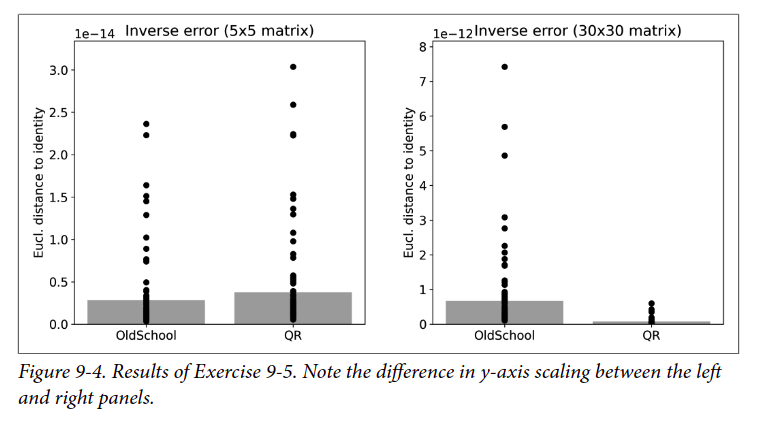

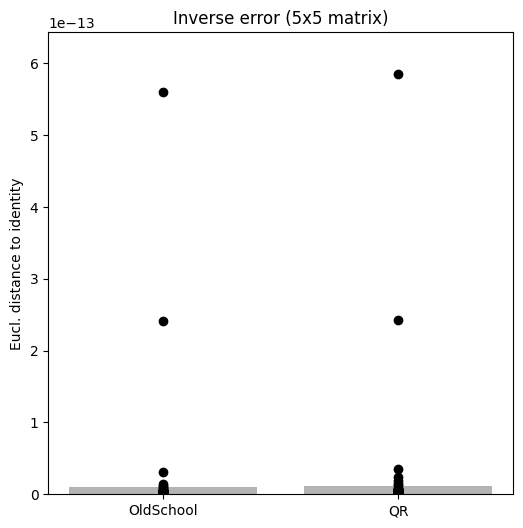

In [20]:
# run experiment

# matrix size
n = 5

numExprs = 100

sse = np.zeros((numExprs,2))

for expi in range(numExprs):

  # create matrix
  A = np.random.randn(n,n)

  # old-school inverse method
  Ainv_old = oldSchoolInv(A)
  AAi_old  = Ainv_old@A

  # via QR
  Q,R = np.linalg.qr(A)
  Ainv_qr = oldSchoolInv(R)@Q.T # using the old-school method
  # Ainv_qr = np.linalg.inv(R)@Q.T # using numpy's inv
  AAi_qr  = Ainv_qr@A

  # differences
  trueI = np.eye(n)
  sse[expi,0] = np.sqrt(np.sum((AAi_old-trueI)**2))
  sse[expi,1] = np.sqrt(np.sum((AAi_qr-trueI )**2))


# and plot
plt.figure(figsize=(6,6))

plt.plot(np.zeros(numExprs),sse[:,0],'ko')
plt.plot(np.ones(numExprs),sse[:,1],'ko')
plt.bar(range(2),np.mean(sse,axis=0),color=[.7,.7,.7])

plt.xticks(range(2),labels=['OldSchool','QR'])
plt.ylim([0,np.max(sse)*1.1])
plt.ylabel('Eucl. distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix)',ha='center')
plt.show()

### Question 9-6. An  interesting  property  of  square  orthogonal  matrices  is  that  all  of  their  singular values (and their eigenvalues) are 1. That means that they have an induced 2-norm of 1 (the induced norm is the largest singular value), and they have a Frobenius norm of M. The latter result is because the Frobenius norm equals the square root of the sum of the squared singular values. In this exercise, you will confirm these properties.
### Create  an  M×M  orthogonal  matrix  as  the  QR  decomposition  of  a  random  matrix.<br>Compute  its  induced  2-norm  using  np.linalg.norm  and  compute  its  Frobenius norm.<br>Confirm  that  both  quantities  are  1  (to  within  a  reasonable  tolerance  of  roundingerror). Check using several different values of M
### Next,  explore  the  meaning  of  the  induced  norm  using  matrix-vector  multiplication.Create  a  random  M-element  column  vector  v.  Then  compute  the  norms  of  v  and Qv.  Those  norms  should  equal  each  other  (although  you  wouldn’t  expect  them  toequal 1)

In [22]:
# create a random orthogonal matrix
n = 13
Q,R = np.linalg.qr(np.random.randn(n,n))

# print out the norms
print( np.linalg.norm(Q,2),               # induced 2-norm
       np.sqrt( np.sum(Q**2) )/np.sqrt(n) # manually computed Frobenius norm
)
# effects of matrix multiplication on vector norm

# a random vector
v = np.random.randn(n,1)

# norms
norm_v  = np.linalg.norm(v)
norm_Qv = np.linalg.norm(Q@v)

# print them
print(norm_v)
print(norm_Qv)

1.0000000000000004 1.0000000000000002
2.466279334663694
2.466279334663694


### Question 9-7.This  exercise  will  highlight  one  feature  of  the  R  matrix  that  is  relevant  for  understanding  how  to  use  QR  to  implement  least  squares  (Chapter  12):  when  A  is  tall and  full  column-rank,  the  first  N  rows  of  R  are  upper-triangular,  whereas  rows  N+1  through  M  are  zeros.  Confirm  this  in  Python  using  a  random  10 × 4  matrix. Make sure to use the complete (full) QR decomposition, not the economy (compact)decomposition.
### Of course, R is noninvertible because it is nonsquare. But (1) the submatrix compris‐ing  the  first  N  rows  is  square  and  full-rank  (when  A  is  full  column-rank)  and  thushas a full inverse, and (2) the tall R has a pseudoinverse. Compute both inverses, andconfirm that the full inverse of the first N rows of R equals the first N columns of thepseudoinverse of the tall R

In [24]:
# the matrix
A = np.random.randn(10,4)

# get R
_,R = np.linalg.qr(A,'complete')

# examine R
np.round(R,3)

array([[-2.486,  0.693, -0.53 , -0.179],
       [ 0.   , -3.282, -0.459,  0.076],
       [ 0.   ,  0.   ,  2.878, -0.708],
       [ 0.   ,  0.   ,  0.   , -2.433],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ]])

In [25]:
# invertible submatrix
Rsub = R[:4,:]

# inverses
Rsub_inv = np.linalg.inv(Rsub)
Rleftinv = np.linalg.pinv(R)

# print out both
print('Full inverse of R submatrix:')
print(np.round(Rsub_inv,3)), print(f'\n\n')

print('Left inverse of R:')
print(np.round(Rleftinv,3))

Full inverse of R submatrix:
[[-0.402 -0.085 -0.088  0.053]
 [-0.    -0.305 -0.049  0.005]
 [ 0.     0.     0.347 -0.101]
 [-0.    -0.    -0.    -0.411]]



Left inverse of R:
[[-0.402 -0.085 -0.088  0.053  0.     0.     0.     0.     0.     0.   ]
 [-0.    -0.305 -0.049  0.005  0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.     0.347 -0.101  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.411  0.     0.     0.     0.     0.     0.   ]]
